## Robustness study
The aim of this notebook is to:
    1. compare the estimation performances of the LASSO and MOM LASSO both implemented with ADMM when dataset are corrupted by "bad data"(estimation error versus pourcentage of outliers);
    3. compare convergence properties of the two estimators (estimation error versus time); 
    4. optimal choice of K and  lamda in function of outliers proportion
    
Note: Optimal values of the number of blocks K and of the regularization parameter lamda are obtained from a minimization of the MOM-CV criteria from the notebook *MOM-CV*

In [9]:
import nbimporter
import MOM_LASSO as MOM_LASSO
import MOM_CV as MOM_CV

import numpy as np
from numpy.random import multivariate_normal, randn
from numpy.linalg import norm
from numpy import sqrt
from scipy.linalg import svd
from scipy.linalg.special_matrices import toeplitz
from scipy import linalg
import matplotlib.pylab as plt
import time
from sklearn.utils import shuffle

np.set_printoptions(precision=2)
%matplotlib inline

Importing Jupyter notebook from MOM_LASSO.ipynb
Importing Jupyter notebook from MOM_CV.ipynb


## Compare performance of ADMM and MOM-ADMM on a dataset without outliers

In [2]:
np.random.seed(50)
n_features, sparsity = 500, 100
beta_0 = MOM_LASSO.beta_func(n_features, sparsity)
n_samples,  sigma = 200, 1
y, X = MOM_LASSO.data1(n_samples, beta_0,  sigma)
beta_0 = np.matrix(beta_0).T
y = np.matrix(y).T
X = np.matrix(X)

In [3]:
lamda = 2*sigma*sqrt(np.log(n_features)/n_samples)
max_iter = 1000
error_ADMM, obj_ADMM, w = MOM_LASSO.ADMM(X, y, beta_0, max_iter, lamda)

In [4]:
K = 2
mom_error_ADMM, mom_obj_ADMM, x = MOM_LASSO.MOM_ADMM(X, y, beta_0, K, max_iter, lamda)

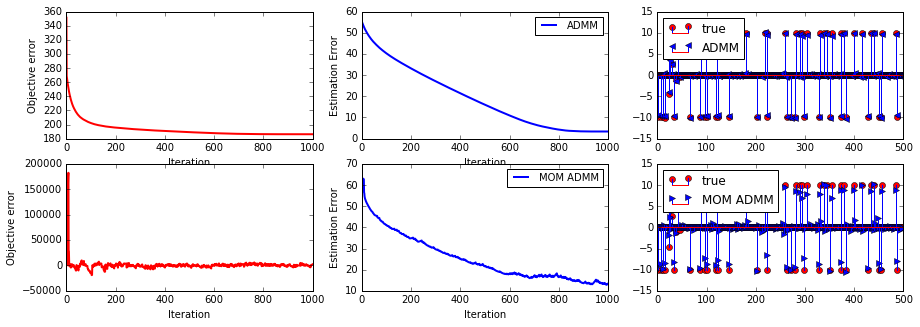

In [5]:
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(231)
plt.plot(t, np.array(obj_ADMM), 'r', linewidth = 2, label = 'ADMM')
#plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(232)
plt.plot(t, np.array(error_ADMM), 'b', linewidth = 2, label = 'ADMM')
plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.subplot(233)
plt.stem(beta_0, markerfmt='ro', label='true')
plt.stem(w, markerfmt='b<', label = 'ADMM')
plt.legend(loc=2)
plt.subplot(234)
plt.plot(t, np.array(mom_obj_ADMM), 'r', linewidth = 2, label = 'MOM ADMM')
#plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(235)
plt.plot(t, np.array(mom_error_ADMM), 'b', linewidth = 2, label = 'MOM ADMM')
plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.subplot(236)
plt.stem(beta_0, markerfmt='ro', label='true')
plt.stem(x, markerfmt='b>', label = 'MOM ADMM')
plt.legend(loc=2)

## Robustness study

In [6]:
n_samples, n_features, sparsity, sigma, max_iter = 200, 500, 10, 1, 600

K, lamda = 20, 2*sigma*sqrt(np.log(n_features)/n_samples)

np.random.seed(50)
beta_0 = MOM_LASSO.beta_func(n_features, sparsity)
y1, X1 = MOM_LASSO.data1(n_samples, beta_0,  sigma)

beta_0 = np.matrix(beta_0).T
print(np.linalg.norm(beta_0))

22.360679775


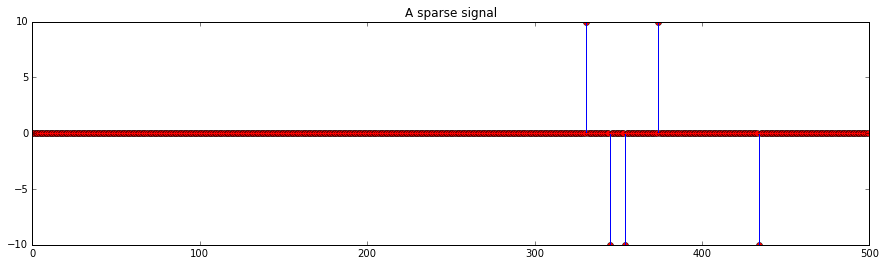

In [7]:
plt.figure(figsize = (15, 4))
plt.stem(beta_0, markerfmt='ro', label='true')
plt.title('A sparse signal')

In [8]:
def robustness(X1, y1, beta_0, grid_proportion_outliers, K, lamda):
    error_lasso = []
    error_mom_lasso = []
    for prop in grid_proportion_outliers:
        n_outliers = int(n_samples*prop)
        print('----------------proportion outliers = {} -- n_outliers = {}'.format(prop, n_outliers))
        N = n_samples + n_outliers
        y2, X2 = MOM_LASSO.data2(n_outliers, n_features, type_outliers = 2)
        y, X = MOM_LASSO.data_merge(y1, X1, y2, X2)
        print(np.linalg.norm(y))
        y, X = np.matrix(y).T, np.matrix(X)

        error_ADMM, _, _ = MOM_LASSO.ADMM(X, y, beta_0, max_iter, lamda)
        mom_error_ADMM, _, _ = MOM_LASSO.MOM_ADMM(X, y, beta_0, K, max_iter, lamda)
        error_lasso.append(error_ADMM[-1])
        error_mom_lasso.append(mom_error_ADMM[-1])
    return error_lasso, error_mom_lasso

In [9]:
grid_proportion_outliers = np.arange(0, 10, 2)/100
error_lasso, error_mom_lasso = robustness(X1, y1, beta_0, grid_proportion_outliers, K, lamda)

----------------proportion outliers = 0.0 -- n_outliers = 0
308.274665305
Lauching ADMM solver...
iter= 0, estimation error ADMM = 22.360680
iter= 100, estimation error ADMM = 1.092014
iter= 200, estimation error ADMM = 1.089442
iter= 300, estimation error ADMM = 1.089403
iter= 400, estimation error ADMM = 1.089114
iter= 500, estimation error ADMM = 1.089173
Lauching MOM-ADMM solver...
iter= 0, estimation error MOM ADMM = 22.360680
iter= 100, estimation error MOM ADMM = 19.973833
iter= 200, estimation error MOM ADMM = 20.244033
iter= 300, estimation error MOM ADMM = 20.086204
iter= 400, estimation error MOM ADMM = 20.136828
iter= 500, estimation error MOM ADMM = 20.404793
----------------proportion outliers = 0.02 -- n_outliers = 4
20002.3756906
Lauching ADMM solver...
iter= 0, estimation error ADMM = 22.360680
iter= 100, estimation error ADMM = 554.766396
iter= 200, estimation error ADMM = 557.152871
iter= 300, estimation error ADMM = 558.878928
iter= 400, estimation error ADMM = 559.

In [10]:
error_lasso

[1.0892929267950631,
 560.73212534848233,
 560.73459496000191,
 560.73541816393822,
 560.73582976583396]

In [11]:
error_mom_lasso

[20.46849738419208,
 21.377897726511776,
 18.728301069734353,
 458.94971479537418,
 457.18558197131404]

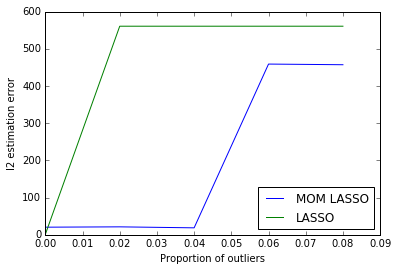

In [12]:
plt.plot(grid_proportion_outliers, error_mom_lasso, label = 'MOM LASSO' )
plt.plot(grid_proportion_outliers, error_lasso, label = 'LASSO')
plt.xlabel('Proportion of outliers')
plt.legend(loc=4, prop={'size':12})
plt.ylabel('l2 estimation error')

## Study of the robustness with adaptive choice of $K$ and $\lambda$

In [9]:
def robustness_adaptive(X1, y1, beta_0, grid_proportion_outliers, V, grid_K, grid_lamda):
    error_lasso = []
    error_mom_lasso = []
    choice_lambda_lasso = []
    choice_lambda_mom_lasso = []
    choice_K_mom_lasso = []
    for prop in grid_proportion_outliers:
        n_outliers = int(n_samples*prop)
        print('----------------proportion outliers = {} -- n_outliers = {}'.format(prop, n_outliers))
        N = n_samples + n_outliers
        y2, X2 = MOM_LASSO.data2(n_outliers, n_features, type_outliers = 2)
        y, X = MOM_LASSO.data_merge(y1, X1, y2, X2)
        print(np.linalg.norm(y))
        y, X = np.matrix(y).T, np.matrix(X)
        
        perf = MOM_CV.cv_admm(X, y, beta_0, max_iter, V, grid_lamda)
        lamda = MOM_CV.ind_lamda(perf, grid_lamda)
        choice_lambda_lasso.append(lamda)
        error_ADMM, _, _ = MOM_LASSO.ADMM(X, y, beta_0, max_iter, lamda)
        
        K_prime = int(np.max(grid_K)/V)
        perf = MOM_CV.mom_cv_admm(X, y, beta_0, max_iter, V, K_prime, grid_K, grid_lamda)
        lamda, K = MOM_CV.ind_K_lamda(perf, grid_K, grid_lamda)
        choice_lambda_mom_lasso.append(lamda)
        choice_K_mom_lasso.append(K)
        mom_error_ADMM, _, _ = MOM_LASSO.MOM_ADMM(X, y, beta_0, K, max_iter, lamda)
        
        error_lasso.append(error_ADMM[-1])
        error_mom_lasso.append(mom_error_ADMM[-1])
    return error_lasso, error_mom_lasso, choice_lambda_lasso, choice_lambda_mom_lasso, choice_K_mom_lasso

In [11]:
n_samples, n_features, sparsity, sigma, max_iter = 200, 500, 10, 1, 200

np.random.seed(50)
beta_0 = MOM_LASSO.beta_func(n_features, sparsity)
y1, X1 = MOM_LASSO.data1(n_samples, beta_0,  sigma)
V = 5

beta_0 = np.matrix(beta_0).T
print(np.linalg.norm(beta_0))

grid_proportion_outliers = np.arange(0, 15, 1)/100
N_max = (1+np.max(grid_proportion_outliers))*n_samples
grid_lamda, grid_K = np.arange(0, 50, 4)/sqrt(N_max), np.arange(1, int(N_max/4), 4)

22.360679775


In [11]:
V = 5
now = time.time()
error_lasso, error_mom_lasso, choice_lambda_lasso, choice_lambda_mom_lasso, choice_K_mom_lasso = robustness_adaptive(X1, y1, beta_0, grid_proportion_outliers, V, grid_K, grid_lamda)
print(time.time() - now)

----------------proportion outliers = 0.0 -- n_outliers = 0
308.274665305
--------------------------------lamda = 0.0
-----cv_error_lamda = 113.7482789078033
--------------------------------lamda = 0.26490647141300877
-----cv_error_lamda = 61.737356004509934
--------------------------------lamda = 0.5298129428260175
-----cv_error_lamda = 44.37864793452522
--------------------------------lamda = 0.7947194142390263
-----cv_error_lamda = 35.67904784824511
--------------------------------lamda = 1.059625885652035
-----cv_error_lamda = 30.44401177345481
--------------------------------lamda = 1.3245323570650438
-----cv_error_lamda = 26.941339058544717
--------------------------------lamda = 1.5894388284780525
-----cv_error_lamda = 24.43154623865637
--------------------------------lamda = 1.8543452998910612
-----cv_error_lamda = 22.54045846757442
--------------------------------lamda = 2.11925177130407
-----cv_error_lamda = 21.06052561534959
--------------------------------lamda = 2.38415824

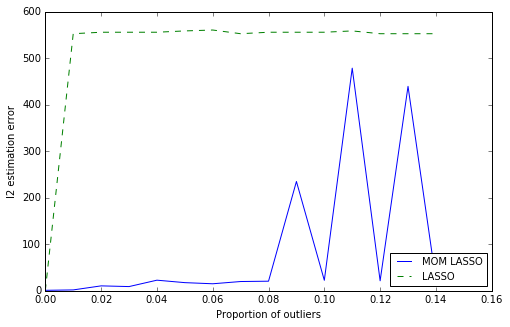

In [13]:
plt.figure(figsize=(8,5))
plt.plot(grid_proportion_outliers, error_mom_lasso, label = 'MOM LASSO' )
plt.plot(grid_proportion_outliers, error_lasso, '--', label = 'LASSO')
plt.xlabel('Proportion of outliers')
plt.legend(loc=4, prop={'size':10})
plt.ylabel('l2 estimation error')
#titre = 'n_sample = {}, d = {}, sparsity = {}, sigma = {}, V = {}'.format(n_samples, n_features, sparsity, sigma, V)
#plt.title(titre)
filename = 'n{}_d{}_s{}_sigma{}_V{}_4.png'.format(n_samples, n_features, sparsity, sigma, V)
#plt.savefig(filename)

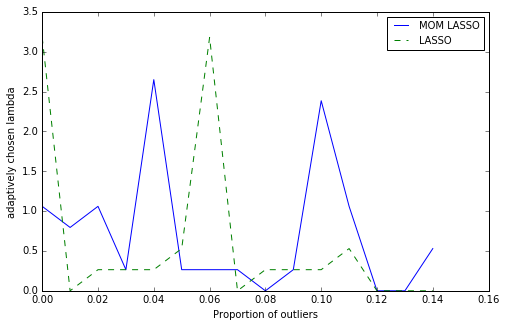

In [14]:
plt.figure(figsize=(8,5))
plt.plot(grid_proportion_outliers, choice_lambda_mom_lasso, label = 'MOM LASSO') 
plt.plot(grid_proportion_outliers, choice_lambda_lasso, '--', label = 'LASSO' )
plt.xlabel('Proportion of outliers')
plt.legend(loc=1, prop={'size':10})
plt.ylabel('adaptively chosen lambda')
filename = 'CVlambda_n{}_d{}_s{}_sigma{}_V{}_4.png'.format(n_samples, n_features, sparsity, sigma, V)
plt.savefig(filename)

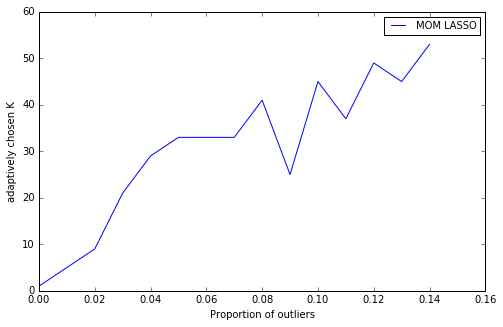

In [15]:
plt.figure(figsize=(8,5))
plt.plot(grid_proportion_outliers, choice_K_mom_lasso, label = 'MOM LASSO') 
plt.xlabel('Proportion of outliers')
plt.legend(loc=1, prop={'size':10})
plt.ylabel('adaptively chosen K')
filename = 'CVK_n{}_d{}_s{}_sigma{}_V{}_4.png'.format(n_samples, n_features, sparsity, sigma, V)
plt.savefig(filename)

In [16]:
dict_new = {}

In [17]:
#step 2 done
#dict_final[3] = [error_lasso, error_mom_lasso, choice_lambda_lasso, choice_lambda_mom_lasso, choice_K_mom_lasso]
dict_new[1] = [error_lasso, error_mom_lasso, choice_lambda_lasso, choice_lambda_mom_lasso, choice_K_mom_lasso]

In [18]:
#For next use, save the final dictionary
#import pickle
#filename = 'dict_final.p'
#for saving
#with open(filename, "wb") as f:
#    pickle.dump(dict_final, f)
#for loading
#with open(filename, "rb") as f:
#    dict_final = pickle.load(f)

In [20]:
#dict_final.keys()
dict_new.keys()

dict_keys([1])

In [21]:
for step in [2, 3, 4, 5]:#, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]:
    print('-------------------------------------------------------step = {}'.format(step))
    now = time.time()
    error_lasso, error_mom_lasso, choice_lambda_lasso, choice_lambda_mom_lasso, choice_K_mom_lasso = robustness_adaptive(X1, y1, beta_0, grid_proportion_outliers, V, grid_K, grid_lamda)
    print('------------------------------------------------time = {}'.format(time.time() - now))
    ######plt 1
    #plt.figure(figsize=(8,5))
    #plt.plot(grid_proportion_outliers, error_mom_lasso, label = 'MOM LASSO' )
    #plt.plot(grid_proportion_outliers, error_lasso, '--', label = 'LASSO')
    #plt.xlabel('Proportion of outliers')
    #plt.legend(loc=4, prop={'size':10})
    #plt.ylabel('l2 estimation error')
    #titre = 'n_sample = {}, d = {}, sparsity = {}, sigma = {}, V = {}'.format(n_samples, n_features, sparsity, sigma, V)
    #plt.title(titre)
    #filename = 'n{}_d{}_s{}_sigma{}_V{}_step{}.png'.format(n_samples, n_features, sparsity, sigma, V, step)
    #plt.savefig(filename)
    ########plt 2
    #plt.figure(figsize=(8,5))
    #plt.plot(grid_proportion_outliers, choice_lambda_mom_lasso, label = 'MOM LASSO') 
    #plt.plot(grid_proportion_outliers, choice_lambda_lasso, '--', label = 'LASSO' )
    #plt.xlabel('Proportion of outliers')
    #plt.legend(loc=1, prop={'size':10})
    #plt.ylabel('adaptively chosen lambda')
    #filename = 'CVlambda_n{}_d{}_s{}_sigma{}_V{}_step{}.png'.format(n_samples, n_features, sparsity, sigma, V, step)
    #plt.savefig(filename)
    ##############plt 3
    #plt.figure(figsize=(8,5))
    #plt.plot(grid_proportion_outliers, choice_K_mom_lasso, label = 'MOM LASSO') 
    #plt.xlabel('Proportion of outliers')
    #plt.legend(loc=1, prop={'size':10})
    #plt.ylabel('adaptively chosen K')
    #filename = 'CVK_n{}_d{}_s{}_sigma{}_V{}_step{}.png'.format(n_samples, n_features, sparsity, sigma, V, step)
    #plt.savefig(filename)
    ###### dict
    #dict_final[step] = [error_lasso, error_mom_lasso, choice_lambda_lasso, choice_lambda_mom_lasso, choice_K_mom_lasso]   
    dict_new[step] = [error_lasso, error_mom_lasso, choice_lambda_lasso, choice_lambda_mom_lasso, choice_K_mom_lasso]   

-------------------------------------------------------step = 2
----------------proportion outliers = 0.0 -- n_outliers = 0
308.274665305
--------------------------------lamda = 0.0
-----cv_error_lamda = 114.43578890134124
--------------------------------lamda = 0.26490647141300877
-----cv_error_lamda = 62.07923125585248
--------------------------------lamda = 0.5298129428260175
-----cv_error_lamda = 44.60910983217938
--------------------------------lamda = 0.7947194142390263
-----cv_error_lamda = 35.861999644206854
--------------------------------lamda = 1.059625885652035
-----cv_error_lamda = 30.595458118616477
--------------------------------lamda = 1.3245323570650438
-----cv_error_lamda = 27.068863961234594
--------------------------------lamda = 1.5894388284780525
-----cv_error_lamda = 24.539220448949077
--------------------------------lamda = 1.8543452998910612
-----cv_error_lamda = 22.6308905633851
--------------------------------lamda = 2.11925177130407
-----cv_error_lamda = 21

In [1]:
import pickle
filename = 'dict_mom_lasso_random_blocks.p'
#for loading
with open(filename, "rb") as f:
    dict_mom_lasso_random_blocks = pickle.load(f)

In [2]:
#dict_new.keys()
dict_mom_lasso_random_blocks.keys()

dict_keys([1, 2])

In [23]:
import pickle
filename = 'dict_new.p'
#for saving
with open(filename, "wb") as f:
    pickle.dump(dict_new, f)

In [5]:
list_error_lasso = []
list_error_mom_lasso = []
list_error_lamda_lasso = []
list_error_lamda_mom_lasso = []
list_error_K_mom_lasso = []
for i in dict_mom_lasso_random_blocks.keys():
    error_lasso, error_mom_lasso, choice_lambda_lasso, choice_lambda_mom_lasso, choice_K_mom_lasso, list_ind = dict_mom_lasso_random_blocks[i]
    list_error_lasso.append(error_lasso)
    list_error_mom_lasso.append(error_mom_lasso)
    list_error_lamda_lasso.append(choice_lambda_lasso)
    list_error_lamda_mom_lasso.append(choice_lambda_mom_lasso)
    list_error_K_mom_lasso.append(choice_K_mom_lasso)

In [7]:
mat_error_lasso = np.matrix(list_error_lasso)
mat_error_mom_lasso = np.matrix(list_error_mom_lasso)
mat_lamda_lasso = np.matrix(list_error_lamda_lasso)
mat_lamda_mom_lasso = np.matrix(list_error_lamda_mom_lasso)
mat_K_mom_lasso = np.matrix(list_error_K_mom_lasso)

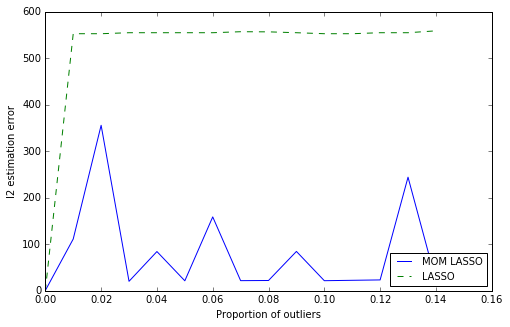

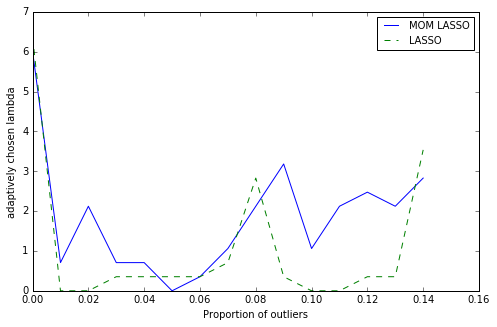

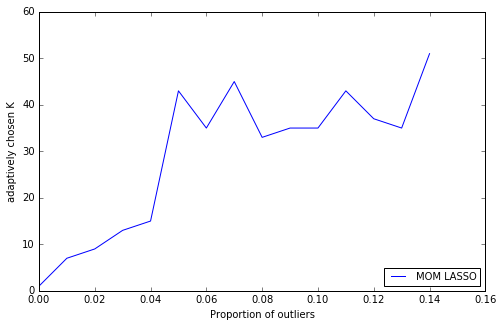

In [12]:
plt.figure(figsize=(8,5))
plt.plot(grid_proportion_outliers, mat_error_mom_lasso.mean(0).T, label = 'MOM LASSO' )
plt.plot(grid_proportion_outliers, mat_error_lasso.mean(0).T, '--', label = 'LASSO')
plt.xlabel('Proportion of outliers')
plt.legend(loc=4, prop={'size':10})
plt.ylabel('l2 estimation error')
#titre = 'n_sample = {}, d = {}, sparsity = {}, sigma = {}, V = {}'.format(n_samples, n_features, sparsity, sigma, V)
#plt.title(titre)
filename = 'average_n{}_d{}_s{}_sigma{}_V{}.png'.format(n_samples, n_features, sparsity, sigma, V)
#plt.savefig(filename)
########plt 2
plt.figure(figsize=(8,5))
plt.plot(grid_proportion_outliers, mat_lamda_mom_lasso.mean(0).T, label = 'MOM LASSO') 
plt.plot(grid_proportion_outliers, mat_lamda_lasso.mean(0).T, '--', label = 'LASSO' )
plt.xlabel('Proportion of outliers')
plt.legend(loc=1, prop={'size':10})
plt.ylabel('adaptively chosen lambda')
filename = 'average_CVlambda_n{}_d{}_s{}_sigma{}_V{}.png'.format(n_samples, n_features, sparsity, sigma, V)
#plt.savefig(filename)
##############plt 3
plt.figure(figsize=(8,5))
plt.plot(grid_proportion_outliers, mat_K_mom_lasso.mean(0).T, label = 'MOM LASSO') 
plt.xlabel('Proportion of outliers')
plt.legend(loc=4, prop={'size':10})
plt.ylabel('adaptively chosen K')
filename = 'average_CVK_n{}_d{}_s{}_sigma{}_V{}.png'.format(n_samples, n_features, sparsity, sigma, V)
#plt.savefig(filename)